In [48]:
from pyhdf.SD  import *
import numpy as np 
import matplotlib.pyplot as plt
import os

print(os.getcwd())

def readfile_br(path,start,end):
    sequence=[]
    count=end-start
    for i in range(start,end):
        thispath=path+"br002_"+str(i)+".hdf"
        #print("Reading Files :",thispath)
        image_sequence = SD(thispath, SDC.READ)
        sds_obj = image_sequence.select('Data-Set-2')
        dim3 = sds_obj.get()
        frame=[]
        for i in range(0,141):
            frame.append(dim3[:,:,i])
        frame=np.array(frame)
        sequence.append(frame)
    sequence=np.array(sequence)
    data=sequence.reshape(count,141,128,110,1)
    #data=pad_the_frame(data)
    return data

def scale(data):
    from sklearn.preprocessing import minmax_scale
    shape = data.shape
    data = minmax_scale(data.ravel(), feature_range=(0,255)).reshape(shape)
    return data

def getIntrestingFrames(data,frame_start,frame_end):
    print('todelete shape of data: ', data.shape)
    short_data = np.zeros((data.shape[0],10,128,110,1))           #tf.v1
    for file in range(data.shape[0]):
        short_data[file,0:5]=data[file,frame_start:frame_start+5,:,:,:]   #tf.v1
        short_data[file,5:10]=data[file,frame_start+5:frame_end+1,:,:,:]     #tf.v1
    s=np.array(short_data)
    return s

def createPatchyData(data,window,stride):
    image_size=(data.shape[2],data.shape[3])
    #window=(32,32)
    #stride=(3,3)
    new_data=[]
    frame_num=-1
    for file in range(data.shape[0]):
        h_stop=0
        for h in range(0,image_size[0],stride[0]):
            if h_stop:
                break
            if h + window[0] >= image_size[0]:
                h=image_size[0] - window[0]
                h_stop=1
            v_stop=0
            for v in range(0,image_size[1],stride[1]):
                if v_stop:
                    break
                if v + window[1] >= image_size[1]:
                    v=image_size[1] - window[1]
                    v_stop=1
                frame_num+=1
                new_data.append(data[file,:,h:h + window[0],v:v + window[1],:])
    new_data=np.array(new_data)
    return new_data


/Users/agupta/Documents/DM LAB/projects/e3d_lstm-master/Presentable Experiments


In [49]:
start=0
end=1
sequence_length=10
path="../data/sampleData/"
frame_start=0
frame_end=9
window=(64,64)
stride=(4,4)
#createData(start,end,sequence_length,path,frame_start,frame_end)
data=(readfile_br(path,start,end))

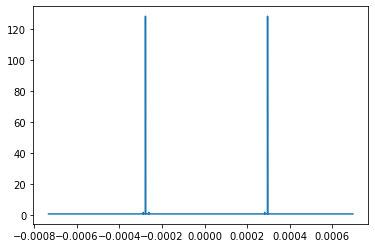

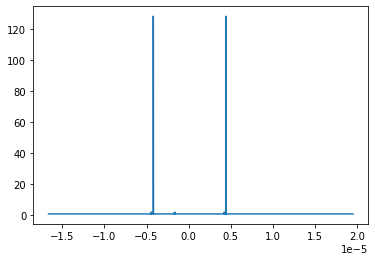

In [50]:
data_plt1=data[0,0,:,:,0].reshape(14080)
xi1_0,yi1_0=np.unique(data_plt1,return_counts=True)
plt.plot(xi1_0,yi1_0)
plt.show()
data_plt2=data[0,140,:,:,0].reshape(14080)
xi2_0,yi2_0=np.unique(data_plt2,return_counts=True)
plt.plot(xi2_0,yi2_0)

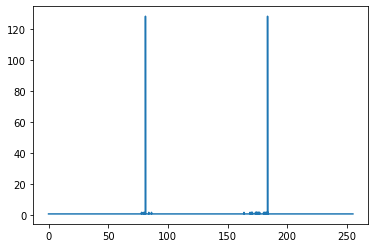

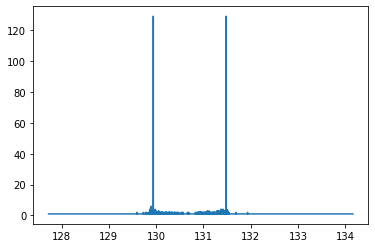

In [51]:

data=scale((readfile_br(path,start,end)))
data_plt1=data[0,0,:,:,0].reshape(14080)
xi1,yi1=np.unique(data_plt1,return_counts=True)
plt.plot(xi1,yi1)
plt.show()
data_plt2=data[0,140,:,:,0].reshape(14080)
xi2,yi2=np.unique(data_plt2,return_counts=True)
plt.plot(xi2,yi2)

In [9]:
data[0,140,118,100,0]

131.46794

In [54]:
xi1[12787]

183.48941

In [41]:
yi1[yi1==128]

array([128, 128])

In [43]:
np.where(yi1 == 128)

(array([ 3078, 12787]),)

In [52]:
xi1_0[3078]

-0.0002774293

In [53]:
xi2_0[12787]

4.4682956e-06

In [56]:
xi1_0[1071]

-0.0002996492